<h1><center> DS200 - Lab 3: Data Visualization </center></h1>

![Data Visualization](https://www.kaushik.net/avinash/wp-content/uploads/2015/09/data_driven_decision_making_cartoon.jpg)

Welcome to the lab for reviewing data visualization! In this lab, you will be using two visualization libraries: matplotlib and Seaborn. Follow the instructions to recreate the plots using the given data.

__NOTE: If using function-based programming, all the code for plotting the same figure should go in the same cell. Separating them out into multiple cells may cause nothing to show up. If you do want to separate them into multiple cells, you can choose to use the object oriented way, then use `plt.show()` or the figure's variable name, e.g. `fig` to display.__

____

## Part I: Matplotlib visualization with Pandas build-ins. (70 points)

### Q1. Import the necessary libraries. Then, import the dataset from this [address](https://raw.githubusercontent.com/BlueJayADAL/DS200/master/datasets/chipotle.tsv) to a DataFrame named `df`. 

Import all necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Create a string the the URL of the dataset.

In [3]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS200/master/datasets/chipotle.tsv'


Read the data into a DataFrame called `df`.

Note that the dataset uses `'\t'` instead of `','` as the column separator. So ensure to pass in the correct parameter to argument `sep` in function `read_csv`

In [4]:
df = pd.read_csv(filepath_or_buffer=url, sep = '\t')


### Q2. Checkout the first 10 entries from the DataFrame, and see the data types of all columns.

In [5]:
df.head(10)



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Q3. Find the top 5 items that are most ordered (in terms of the total quantity).

Hint: understand the meaning of the quantity column.

In [7]:
top_5_items = df.groupby(by='item_name')['quantity'].sum().sort_values(ascending = False).head()



top_5_items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

### Q4: Create a bar chart using Panda's built-in function to visualize the top 5 items that are most ordered from Q3. Use the `ggplot` style.

<AxesSubplot:title={'center':"Most ordered Chipotle's Items"}, xlabel='item_name', ylabel='Count'>

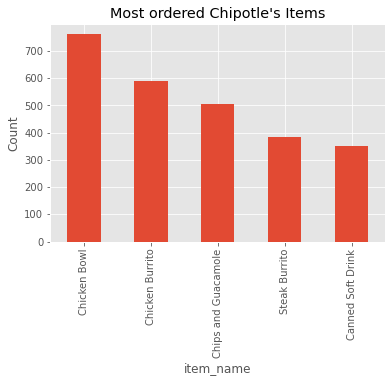

In [8]:
# Set style as ggplot
plt.style.use('ggplot')

# x, y axis labels and the title
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Most ordered Chipotle\'s Items')

# Your code to generate the bar chart
top_5_items.plot.bar()




### Q5: Note that the data in column `item_price` contains a dollar sign. Use a lambda expression together with `apply()` function to remove the dollar sign from that column. 

### In addition, the data type of column `item_price` should no longer be a string type but a float type. Use the `info()` method to verify.

In [9]:
df['item_price'] = df['item_price'].apply(lambda dollar: dollar.split('$')[-1])


df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [11]:
df['item_price'] = df['item_price'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### Q6: Generate a new column named `order_price` that is equivalent to the product of column `quantity` and `item_price`. Then calculate the "total item quantities" and "total order prices" for each `order_id`. 

In [100]:
df.insert(loc = 5,
          column = 'order_price', 
          value = df['item_price']*df['quantity'], 
          allow_duplicates=True)



df.head()

,order_id,quantity,item_name,choice_description,item_price,order_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


### Show "total item quantities" and "total order prices" per order_id. 

In [171]:
pre_order = df.groupby(by='order_id').sum()[['quantity', 'order_price']]

pre_order

,quantity,order_price
order_id,,
1,4,11.56
2,2,33.96
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


### Q7. Create a scatterplot with the `per_order` DataFrame generated from Q6. You need to follow the given object-oriented way to receive full credits. 
Hint: Price should be in the X-axis and Items ordered in the Y-axis

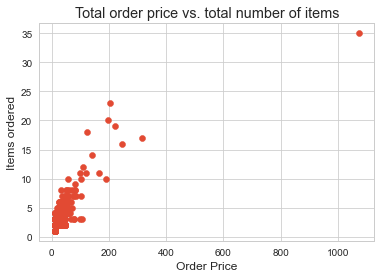

In [193]:
# Your code to create the figure object and axes object with subplots
fig, ax = plt.subplots()


# Set the title and labels
ax.set_xlabel('Order Price')
ax.set_ylabel('Items ordered')
ax.set_title('Total order price vs. total number of items')

# Your code to plot the scatter graph
ax.scatter(data=pre_order, x='order_price', y='quantity')



____
## Part II: Seaborn Visualization (30 points)

__Given the following data:__

We will be working with a famous titanic data set for these exercises. Later on in the Machine Learning section of the course, we will revisit this data, and use it to predict survival rates of passengers. For now, we'll just focus on the visualization of the data with seaborn:

In [132]:
sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


__Recreate the plots below using the `titanic` DataFrame. There are very few hints since most of the plots can be done with just one or two lines of code and a hint would basically give away the solution. Keep careful attention to the x and y labels in each graph for hints.__

### Q8: Recreate the following figure.

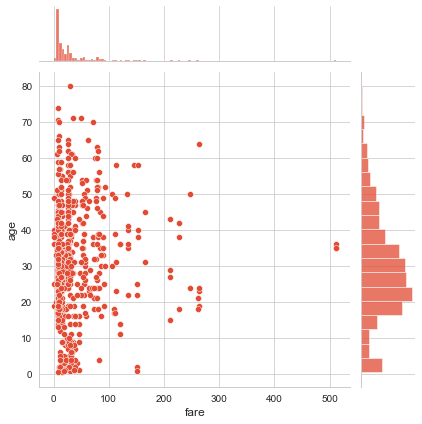

In [134]:
sns.jointplot(data = titanic, x = 'fare', y = 'age')



### Recreate the following figure.

<AxesSubplot:xlabel='sex', ylabel='count'>

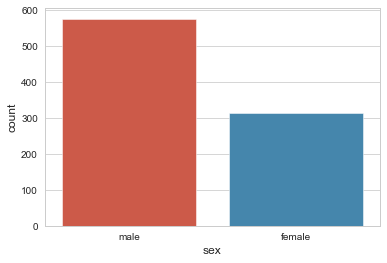

In [137]:
sns.countplot(data = titanic, x = 'sex')



### Q9: Recreate the following figure. Use palette = 'rainbow'

<AxesSubplot:xlabel='class', ylabel='age'>

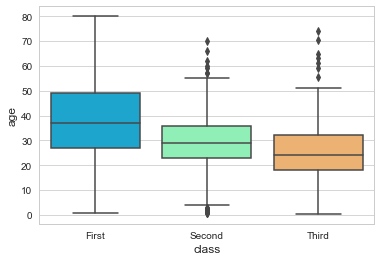

In [140]:
sns.boxplot(data = titanic, x = 'class', y = 'age', palette='rainbow')




### Recreate the following figure. Use palette = 'Set2'

<AxesSubplot:xlabel='class', ylabel='age'>

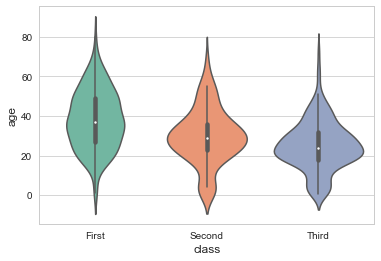

In [141]:
sns.violinplot(data = titanic, x = 'class', y = 'age', palette = 'Set2')



### Q10: The following plot visualizes the correlation matrix among all numeric columns in the dataset. Recreate the following figure. Use `cmap = 'coolwarm'`

In [165]:
titanicCorr = titanic.corr()

<AxesSubplot:title={'center':'titanic.corr()'}>

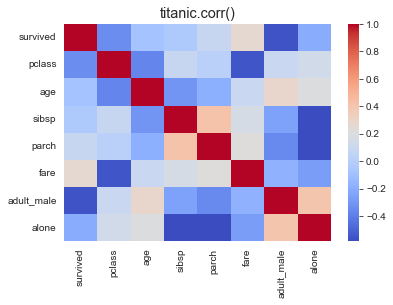

In [167]:
plt.title('titanic.corr()')
sns.heatmap(data = titanicCorr, cmap= 'coolwarm')



### Recreate the following figure with FacetGrid.

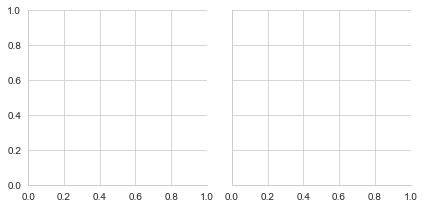

In [161]:
g = sns.FacetGrid(data = titanic, col='sex')

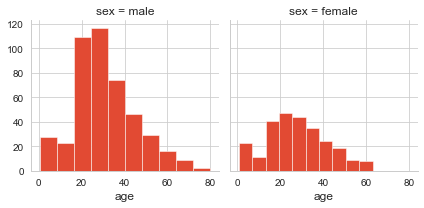

In [162]:

g.map(plt.hist, 'age')


# Great Job!